### 1. Get Data

#### a. get dataTypes

In [7]:
import numpy as np
import sys

data_2010_type = np.loadtxt("./CleanedData/Data_2010_Type.csv", delimiter = ",", dtype="string")
data_2011_type = np.loadtxt("./CleanedData/Data_2011_Type.csv", delimiter = ",", dtype="string")
data_2012_type = np.loadtxt("./CleanedData/Data_2012_Type.csv", delimiter = ",", dtype="string")

#print(data_2010_type)
#print(data_2011_type)
#print(data_2012_type)


#### b. Get column Names

In [6]:
data_2010_name = np.loadtxt("./CleanedData/Data_2010_Names.csv", delimiter = ",", dtype="string")

#print(data_2010_name)

#### c. Load Data

In [13]:
data_2010_raw = np.loadtxt("./CleanedData/Data_2010.csv",  delimiter=',', dtype=str)
data_2011_raw = np.loadtxt("./CleanedData/Data_2011.csv",  delimiter=',', dtype=str)
data_2012_raw = np.loadtxt("./CleanedData/Data_2012.csv",  delimiter=',', dtype=str)

#print data_2010_raw[0,:]
#print data_2011_raw[0,:]
#print data_2012_raw[0,:]
print data_2010_raw.shape
print data_2011_raw.shape
print data_2012_raw.shape


#Use this If we want to combine the data
data = np.append(data_2010_raw, data_2011_raw, axis=0)
data = np.append(data, data_2012_raw, axis=0)
print data.shape

num_records = data.shape[0]
num_features = data.shape[1]

(2082L, 36L)
(2069L, 36L)
(1962L, 36L)
(6113L, 36L)


In [15]:
data_numeric = np.zeros((num_records,num_features))

for j in range(num_features-1):
    type = data_2010_type[j].lstrip('"').rstrip('"')
    if type =='numeric':
        for i in range(num_records) : 
            val = data[i][j].lstrip("'").rstrip("'")
            if(val != 'NA') : 
                data_numeric[i,j] = float(val)
            else : 
                data_numeric[i,j] = -1
    elif type == 'integer':
        for i in range(num_records) : 
            val = data[i][j].lstrip("'").rstrip("'")
            if(val != 'NA') : 
                data_numeric[i,j] = int(val)
            else : 
                data_numeric[i,j] = -1
    else : 
        string_to_num = {}
        dummy = 0
        for i in range(num_records) : 
            key =data[i][j].lstrip("'").rstrip("'") 
            if(key == 'NA' or key.isspace) : 
                data_numeric[i,j] = -1
            elif key in string_to_num.keys():
                data_numeric[i,j] = string_to_num[key]
            else :
                string_to_num[key] = dummy
                data_numeric[i,j] = dummy
                dummy += 1
                
print data_numeric.shape
print data_numeric[0,:]

(6113L, 36L)
[  1.00000000e+01  -1.00000000e+00  -1.00000000e+00   8.80000000e+02
  -1.00000000e+00  -1.00000000e+00   0.00000000e+00   5.00000000e+00
   2.85000000e+02   3.00000000e+00   3.00000000e+00   5.00000000e+00
   3.00000000e+00   2.00000000e+00   7.00000000e+00   7.00000000e+00
   6.00000000e+00   7.00000000e+00   6.59000000e+01   3.00000000e+00
   2.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.93000000e+03   9.32642500e-01
   2.90155440e+00   9.84456000e-01   9.16580311e+01   3.16062180e+00
   5.18135000e-02   3.10880800e-01   9.30000000e+01   0.00000000e+00]


#### d. Load Codebook

In [16]:
data_codebook = np.loadtxt("./CleanedData/Data_2010_CodeBook.csv", delimiter = ",", dtype="string",skiprows=1)
data_codebook

array([['SchoolNumber', 'Integer of School (Unique)'],
       ['EMH', 'E(Elementary) M(Middle) H(High)'],
       ['SchoolName', 'String of School Name'],
       ['DistrictNumber', 'Integer of District'],
       ['DistrictName', 'String of District Name'],
       ['EMHcombined',
        'EM / MH/ EMH (Combination of E/M/H to show which grades this school has or empty if only one school)'],
       ['AlternativeSchool', '1 - 2 (1 : Yes / 2 : No)'],
       ['SchoolGrade', '1 - 13 (13 being A+  1 being F)'],
       ['RankTotal', 'Total ranking out of all schools'],
       ['OverallAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['ReadingAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['MathAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['WritingAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['ScienceAcheivedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['OverallGrowthGrade', '1 - 13 (13 being A+  1 being F)'],
       ['ReadingGrowthGrade', 

### 2. Parse/clean data
Get columns of interest, make the grade a binary variable

#### a. Get columns of interest

In [18]:
data_codebook[34]

array(['PercentFreeOrReducedLunch', 'Percent'], 
      dtype='|S100')

In [83]:
cols = [7,27,28,29,30,31,32,33, 34]

data_interest = data_numeric[:,cols]

#make goal into binary
data_interest[:,0] = [0 if x <=  6 else 1 for x in data_interest[:,0]]
code_interest = data_codebook[cols]
print data_interest.shape
print code_interest

target = data_interest[:,0]
features = data_interest[:,1:9]

#print target.shape
#print features.shape

(6113L, 9L)
[['SchoolGrade' '1 - 13 (13 being A+  1 being F)']
 ['PercentAmericanIndian' 'Percent']
 ['PercentAsian' 'Percent']
 ['PercentBlack' 'Percent']
 ['PercentHispanic' 'Percent']
 ['PercentWhite' 'Percent']
 ['PercentPacificIslander' 'Percent']
 ['PercentTwoOrMoreRace' 'Percent']
 ['PercentFreeOrReducedLunch' 'Percent']]
(6113L,)


#### b. Divide into test/train sets

In [85]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=42)
print(features_train.shape)
print(features_test.shape)
print len(target_train)
print len(target_test)

(4095L, 8L)
(2018L, 8L)
4095
2018


### 3. Model Training

#### Index
    a. KNN 
    b. Naive Bayes
    c. Gradient Boost
    d. ada boost
    e. bagging
    f. regression

#### a. K-NN

[0.63520163669207697, 0.67787970109248574, 0.68879150416979851, 0.7017774857386071, 0.7083747028570615, 0.71072111478295985, 0.71832114116285195, 0.72323748756498862, 0.73275394399527138, 0.74048281313482855, 0.74713649658648351, 0.7539877020355672, 0.75589312833005873, 0.75662922471714267, 0.75878468367135032, 0.75823981610604863, 0.75823670058133408, 0.75793929152928774, 0.75878669301973189, 0.76016838825850042, 0.76084323305936474, 0.76234179927561285, 0.76170689977506778, 0.76263978637669916, 0.7637918664374872, 0.76563179778617241, 0.76842662718165422, 0.77018040468282478, 0.77068211269901754, 0.77224764109144572, 0.77354850323323554, 0.77380485866412674, 0.77430607960324283, 0.77536893134936258, 0.77586004236931194, 0.77730847251952406, 0.7784250200001851, 0.77951222680597887, 0.78000032745581538, 0.78031199581593047, 0.7808795069989849, 0.78172226254870048, 0.78197026744066722, 0.78261427573595932, 0.78242139151687051, 0.7823756484336174, 0.78290845122040453, 0.78318499221759041

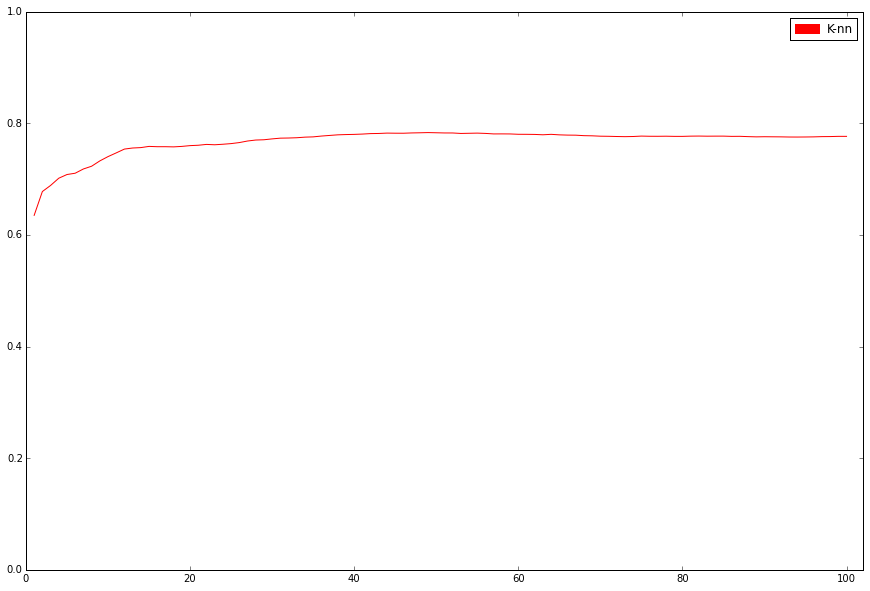

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt


n=100
X=range(1,n+1)
knn_val = []

knnset = [3,4,7]
knn_features = features[:,knnset]


#k-nn
kf = KFold(len(knn_features_train), n_folds=10)

for i in X :
    auc=0
    for train, test in kf :
        knn_features_train, knn_features_test, knn_target_train, knn_target_test = knn_features[train,:], knn_features[test,:], target[train], target[test]
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(knn_features_train, knn_target_train)
        prob = neigh.predict_proba(knn_features_test)
        auc += metrics.roc_auc_score(knn_target_test, prob[:,1])
    knn_val.append(auc/10)

#Plot the results

plt.figure(figsize=(15,10))
plt.axis([0,n+2,0,1])

line_knn_val = plt.plot(X, knn_val, color='red', label = 'K-nn ')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='K-nn')
plt.legend(handles=[red_patch])

print knn_val
print max(knn_val)

In [ ]:
knn_max = max(knn_val)
knn_maxIndex = knn_val.index(knn_max)
print 'Max AUC score of %1.5f with %d neighbors' %(float(knn_max), knn_maxIndex)

#### b. Naive-Bayes

In [117]:
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.cross_validation import train_test_split

#cnbset = [3,4,7]
#cnb_features = features[:,cnbset]
cnb_features = features


cnb_features_train, cnb_features_test, cnb_target_train, cnb_target_test = train_test_split(cnb_features, target, test_size=0.33, random_state=42)

cnb = naive_bayes.GaussianNB()
cnb.fit(cnb_features_train, cnb_target_train)
cprobabilities= cnb.predict_proba(cnb_features_test)
print 'AUC Score : %1.5f' %metrics.roc_auc_score(cnb_target_test, cprobabilities[:,1])


AUC Score : 0.77023


#### c. Gradient-Boosted Decision Trees

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
[0.80126930873290581, 0.8189834306795738, 0.82663582382047507, 0.83605819045000618, 0.84025972020315598, 0.83905471918508323, 0.8418533603206495, 0.84293904414888721, 0.83818019416470757, 0.84190541912465167, 0.84080849886622477, 0.843391345494093, 0.84190727080145833, 0.84297432046351106, 0.84635073314856601]


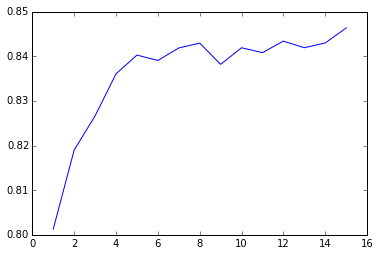

In [135]:
from sklearn import cross_validation
from sklearn.ensemble import GradientBoostingClassifier

#gbset = [3,4,7]
#gb_features = features[:,gbset]
gb_features = features


n = 15
gbt_X = range(1,n+1)

GBT_values = []

for k in gbt_X : 
    print k
    GBT = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=k, random_state=0,loss='deviance')
    cv_auc=cross_validation.cross_val_score(GBT, gb_features, target, scoring='roc_auc', cv=10)
    
    auc=0
    for i in range(len(cv_auc)):
        auc = auc + cv_auc[i]
    auc = auc/10
    GBT_values.append(auc)

print GBT_values

plt.plot(gbt_X,GBT_values)

In [138]:
gbt_max = max(GBT_values)
gbt_maxIndex = GBT_values.index(gbt_max)
print 'Max AUC score of %1.5f with max depth of %d' %(float(gbt_max), gbt_X[gbt_maxIndex])

Max AUC score of 0.84635 with max depth of 14


#### d. ADA Boost

1
2
3
4
5
6
7
8
9
10
[0.78022295741436598, 0.78841022528081994, 0.80153201371612393, 0.80496649850373403, 0.82305858244280183, 0.83683732473773509, 0.84628038792388638, 0.84734184648675837, 0.84261873682104083, 0.84307585656299788]


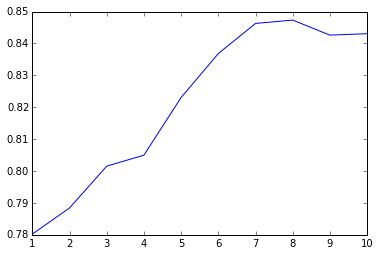

In [120]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#adaset = [3,4,7]
#ada_features = features[:,adaset]
ada_features = features

ada_values = []
n = 10
ada_X = range(1,n+1)

for k in ada_X:
    print k
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=k),
                         algorithm="SAMME",
                         n_estimators=100)
    cv_auc=cross_validation.cross_val_score(ada, ada_features, target, scoring='roc_auc', cv=10)
    auc=0
    for i in range(len(cv_auc)):
        auc = auc + cv_auc[i]
    auc = auc / 10
    ada_values.append(auc)

print ada_values
plt.plot(ada_X,ada_values)


In [139]:
ada_max = max(ada_values)
ada_maxIndex = ada_values.index(ada_max)
print 'Max AUC score of %1.5f with max depth of %d' %(float(ada_max), ada_X[ada_maxIndex])

Max AUC score of 0.84734 with max depth of 7


#### e. Bagging

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
[0.74467683399051432, 0.78475356978350996, 0.79846528414008844, 0.80880588780174212, 0.81890251618487453, 0.82734092255050351, 0.83428004515061172, 0.84039663698806955, 0.84344784648792026, 0.84335572304250328, 0.84614878442607599, 0.84559908079023693, 0.84750482129570104, 0.84730893243099603, 0.84662863621868678, 0.84537332773168794, 0.84787382125014554, 0.84924757416696617, 0.84896917913960745, 0.84770880892483835]


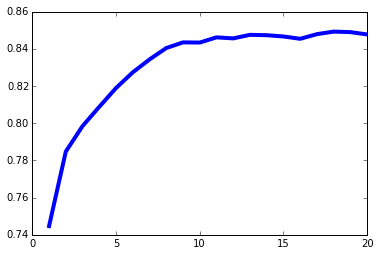

In [133]:
from sklearn import cross_validation
from sklearn import tree
from sklearn import ensemble

#bagset = [3,4,7]
#bag_features = features[:,bagset]
bag_features = features

bag_features_train, bag_features_test, bag_target_train, bag_target_test = train_test_split(bag_features, target, test_size=0.33, random_state=42)

bagging_tree=[]
index = []

n=20
bag_X = range(1,n+1)
for i in bag_X:
    print i
    bagging_dt=ensemble.BaggingClassifier (
    base_estimator=tree.DecisionTreeClassifier(random_state=0,max_depth=i ,min_samples_leaf=5), 
    n_estimators=60)
    bagging_dt.fit(bag_features_train,bag_target_train)
    probabilities_bg_dt = bagging_dt.predict_proba(bag_features_test)
    bagging_tree.append(metrics.roc_auc_score(bag_target_test,probabilities_bg_dt[:,1],sample_weight=None))
    
    
print bagging_tree

plt.plot(bag_X,bagging_tree, linewidth=4.0)

In [ ]:
bt_max = max(bagging_tree)
bt_maxIndex = bagging_tree.index(bt_max)
print 'Max AUC score of %1.5f with max_depth of %d' %(float(bt_max), bag_x[bt_maxIndex])

#### f. regression

In [132]:
from sklearn import datasets, linear_model
from sklearn.metrics import roc_auc_score

#regset = [3,4,7]
#reg_features = features[:,regset]
reg_features = features

reg_features_train, reg_features_test, reg_target_train, reg_target_test = train_test_split(reg_features, target, test_size=0.33, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(reg_features_train, reg_target_train)
reg_scores = regr.predict(reg_features_test)

reg_auc_score = roc_auc_score(reg_target_test, reg_scores)

print "AUC score of %1.5f" %reg_auc_score


AUC score of 0.78304


#### g. random forest

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
[0.74843855544327875, 0.7797110872600882, 0.7929905928795733, 0.80174478611387912, 0.81023828393911723, 0.8200955440855473, 0.82974016454593813, 0.83724174739465751, 0.84419997693231763, 0.85034354794544742, 0.8542212461108537, 0.85505675201163522, 0.85684327459056497, 0.85586046556068518, 0.85622479994051692]


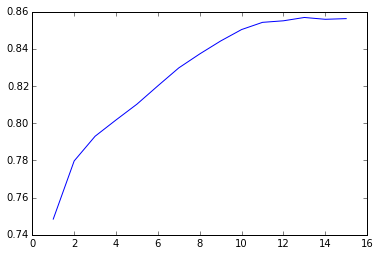

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

n=15
rf_X=range(1,n+1)

#rfset = [3,4,7]
#rf_features = features[:,rfset]
rf_features = features

rf_values=[]

for k in rf_X:
    print k
    rf = RandomForestClassifier(n_estimators=100,max_features=5,max_depth=k)
    cv_auc=cross_validation.cross_val_score(rf, rf_features, target, scoring='roc_auc', cv=10)
    auc=0
    for i in range(len(cv_auc)):
        auc = auc + cv_auc[i]
    auc = auc / 10
    rf_values.append(auc)
    
print rf_values
plt.plot(rf_X,rf_values)

In [147]:
rf_max = max(rf_values)
rf_maxIndex = rf_values.index(rf_max)
print 'Max AUC score of %1.5f with max depth of  %d' %(float(rf_max), rf_X[rf_maxIndex])

Max AUC score of 0.85684 with max depth of  13


### 4. Add results

#### Summary of simple models : 
    a. K-NN : Max AUC score of 0.78355 with 48 neighbors
    b. Naive-Bayes : AUC score of 0.77023
    c. Gradient-Boost Tree : Max AUC score of 0.84635 with max depth of 15
    d. ADA - Boost : Max AUC score of 0.84734 with max depth of 8
    e. Bagging : Max AUC score of 0.84925 with max_depth of 18
    f. Linear Regression : AUC score of 0.78304
    g. Random Forest : Max AUC score of 0.85684 with max depth of  13

#### a. Try with Bagging and Random Forest

At iteration 0
At iteration 1
At iteration 2
At iteration 3
At iteration 4
At iteration 5
At iteration 6
At iteration 7
At iteration 8
At iteration 9
[0.86068900889155986, 0.86118908436739794, 0.86136835920439336, 0.86120998632098866, 0.86090585073087966, 0.86056273940597827, 0.86006929285122879, 0.85937108121604489, 0.85818874780695042, 0.85687793667084089, 0.8553962752988179]


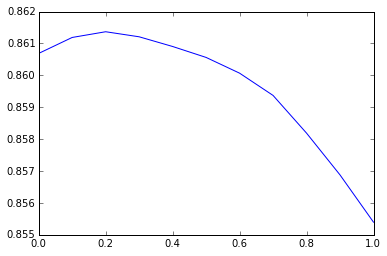

In [196]:
import numpy as np
import sys
from sklearn.cross_validation import KFold
from sklearn import tree
from sklearn import metrics


#combset = [3,4,7]
#comb_features = features[:,combset]
comb_features = features

kf = KFold(len(comb_features), n_folds=10)
auc=0
n = 0

weights = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
auc_scores = {}
auc_scores_list = []
for weight in weights:
    auc_scores[weight]=0
    
    
for train, test in kf:
    print 'At iteration %d' %n
    n += 1
    comb_features_train, comb_features_test, comb_target_train, comb_target_test = comb_features[train], comb_features[test], target[train], target[test]

    #Bagging classifier
    comb_bag_dt=ensemble.BaggingClassifier (
        base_estimator=tree.DecisionTreeClassifier(random_state=0,max_depth=18 ,min_samples_leaf=5), n_estimators=45)
    comb_bag_dt.fit(comb_features_train, comb_target_train)
    comb_bag_prob = comb_bag_dt.predict_proba(comb_features_test)    


    #Random Forest
    comb_rf = RandomForestClassifier(n_estimators=100,max_features=5,max_depth=13)
    comb_rf.fit(comb_features_train, comb_target_train)
    comb_rf_prob = comb_rf.predict_proba(comb_features_test)

    for weight in weights:
        prob = weight * comb_bag_prob + (1-weight) * comb_rf_prob
        auc_scores[weight] += metrics.roc_auc_score(comb_target_test, prob[:,1])

for weight in weights:
    auc_scores_list.append(auc_scores[weight] / 10.0)
        
print auc_scores_list
plt.plot(weights, auc_scores_list)

In [197]:
comb_max = max(auc_scores_list)
comb_max_index = auc_scores_list.index(comb_max)
comb_weight = weights[comb_max_index]
        
print 'Max AUC score of %1.5f with %1.1f weight for bagging and %1.1f weight for Random Forest' %(float(comb_max), comb_weight, 1-comb_weight)

Max AUC score of 0.86137 with 0.2 weight for bagging and 0.8 weight for Random Forest


#### b.Try with Bagging and K-nn

At iteration 0
At iteration 1
At iteration 2
At iteration 3
At iteration 4
At iteration 5
At iteration 6
At iteration 7
At iteration 8
At iteration 9
[0.78710339729967416, 0.80144041529574805, 0.81392782686674392, 0.82481948261587346, 0.83398117634259505, 0.84108662059222783, 0.84668859153915754, 0.85019001052397558, 0.85269439536176517, 0.85385145331270618, 0.85431547895937798]


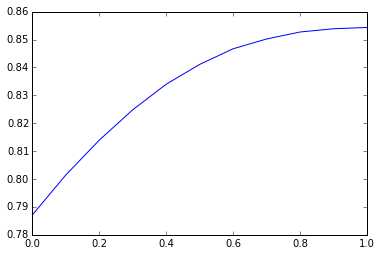

In [179]:
import numpy as np
import sys
from sklearn.cross_validation import KFold
from sklearn import tree
from sklearn import metrics


#comb2set = [3,4,7]
#comb2_features = features[:,comb2set]
comb2_features = features

kf2 = KFold(len(comb2_features), n_folds=10)
n = 0

weights = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
auc_scores2 = {}
auc_scores_list2 = []
for weight in weights:
    auc_scores2[weight]=0
    
    
for train, test in kf2:
    print 'At iteration %d' %n
    n += 1
    comb2_features_train, comb2_features_test, comb2_target_train, comb2_target_test = comb2_features[train], comb2_features[test], target[train], target[test]

    #Bagging classifier
    comb2_bag_dt=ensemble.BaggingClassifier (
        base_estimator=tree.DecisionTreeClassifier(random_state=0,max_depth=18 ,min_samples_leaf=5), n_estimators=45)
    comb2_bag_dt.fit(comb2_features_train, comb2_target_train)
    comb2_bag_prob = comb2_bag_dt.predict_proba(comb2_features_test)    


    #Knn
    comb2_knn = KNeighborsClassifier(n_neighbors=48)
    comb2_knn.fit(comb2_features_train, comb2_target_train)
    comb2_knn_prob = comb2_knn.predict_proba(comb2_features_test)

    for weight in weights:
        prob = weight * comb2_bag_prob + (1-weight) * comb2_knn_prob
        auc_scores2[weight] += metrics.roc_auc_score(comb2_target_test, prob[:,1])

for weight in weights:
    auc_scores_list2.append(auc_scores2[weight] / 10.0)
        
print auc_scores_list2
plt.plot(weights, auc_scores_list2)

In [180]:

comb_max2 = max(auc_scores_list2)
comb_max_index2 = auc_scores_list2.index(comb_max2)
comb_weight2 = weights[comb_max_index2]
        
print 'Max AUC score of %1.5f with %1.1f weight for bagging and %1.1f weight for knn' %(float(comb2_max), comb_weight2, 1-comb_weight2)

Max AUC score of 0.85327 with 1.0 weight for bagging and 0.0 weight for knn


#### c. Try with K-nn and Linear Regression

At iteration 0
At iteration 1
At iteration 2
At iteration 3
At iteration 4
At iteration 5
At iteration 6
At iteration 7
At iteration 8
At iteration 9
[0.77424944360247838, 0.77859682772913197, 0.78187173700270896, 0.78439739018558952, 0.78599341488390584, 0.78740125196608457, 0.78840294175982573, 0.78900832857911796, 0.78918604259495662, 0.78857492774634508, 0.78710339729967416]


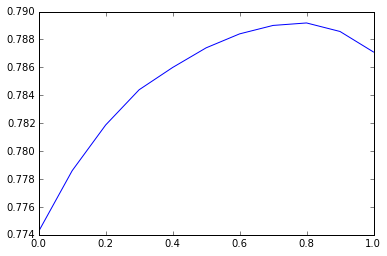

In [186]:
import numpy as np
import sys
from sklearn.cross_validation import KFold
from sklearn import tree
from sklearn import metrics


#comb3set = [3,4,7]
#comb3_features = features[:,comb3set]
comb3_features = features

kf3 = KFold(len(comb3_features), n_folds=10)
n = 0

weights = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
auc_scores3 = {}
auc_scores_list3 = []
for weight in weights:
    auc_scores3[weight]=0
    
    
for train, test in kf3:
    print 'At iteration %d' %n
    n += 1
    comb3_features_train, comb3_features_test, comb3_target_train, comb3_target_test = comb3_features[train], comb3_features[test], target[train], target[test]

    #Knn
    comb3_knn = KNeighborsClassifier(n_neighbors=48)
    comb3_knn.fit(comb3_features_train, comb3_target_train)
    comb3_knn_prob = comb3_knn.predict_proba(comb3_features_test)
    
    #Linear Regression
    comb3_regr = linear_model.LinearRegression()
    comb3_regr.fit(comb3_features_train, comb3_target_train)
    comb3_reg_scores = comb3_regr.predict(comb3_features_test)    

    for weight in weights:
        prob = weight * comb3_knn_prob[:,1] + (1-weight) * comb3_reg_scores
        auc_scores3[weight] += metrics.roc_auc_score(comb3_target_test, prob)

for weight in weights:
    auc_scores_list3.append(auc_scores3[weight] / 10.0)
        
print auc_scores_list3
plt.plot(weights, auc_scores_list3)

In [188]:
comb_max3 = max(auc_scores_list3)
comb_max_index3 = auc_scores_list3.index(comb_max3)
comb_weight3 = weights[comb_max_index3]
        
print 'Max AUC score of %1.5f with %1.1f weight for k-nn and %1.1f weight for regression' %(float(comb_max3), comb_weight3, 1-comb_weight3)

Max AUC score of 0.78919 with 0.8 weight for k-nn and 0.2 weight for regression


#### d. Try with random forest and regression

At iteration 0
At iteration 1
At iteration 2
At iteration 3
At iteration 4
At iteration 5
At iteration 6
At iteration 7
At iteration 8
At iteration 9
[0.77424944360247838, 0.79678582180897262, 0.81531367632964802, 0.82983986160496226, 0.84096465649521102, 0.84883533303300995, 0.85363051006446322, 0.85644015995888534, 0.85796151040362489, 0.85814084490162812, 0.85726425623218439]


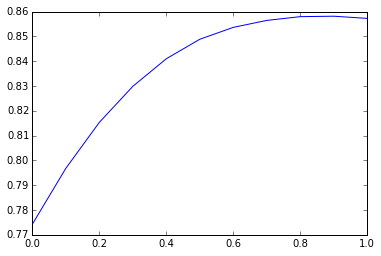

In [189]:
import numpy as np
import sys
from sklearn.cross_validation import KFold
from sklearn import tree
from sklearn import metrics


#comb4set = [3,4,7]
#comb4_features = features[:,comb4set]
comb4_features = features

kf4 = KFold(len(comb4_features), n_folds=10)
n = 0

weights = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
auc_scores4 = {}
auc_scores_list4 = []
for weight in weights:
    auc_scores4[weight]=0
    
    
for train, test in kf4:
    print 'At iteration %d' %n
    n += 1
    comb4_features_train, comb4_features_test, comb4_target_train, comb4_target_test = comb4_features[train], comb4_features[test], target[train], target[test]

    #Random Forest
    comb4_rf = RandomForestClassifier(n_estimators=100,max_features=5,max_depth=13)
    comb4_rf.fit(comb4_features_train, comb4_target_train)
    comb4_rf_prob = comb4_rf.predict_proba(comb4_features_test)
    
    #Linear Regression
    comb4_regr = linear_model.LinearRegression()
    comb4_regr.fit(comb4_features_train, comb4_target_train)
    comb4_reg_scores = comb4_regr.predict(comb4_features_test)    

    for weight in weights:
        prob = weight * comb4_rf_prob[:,1] + (1-weight) * comb4_reg_scores
        auc_scores4[weight] += metrics.roc_auc_score(comb4_target_test, prob)

for weight in weights:
    auc_scores_list4.append(auc_scores4[weight] / 10.0)
        
print auc_scores_list4
plt.plot(weights, auc_scores_list4)

In [190]:
comb_max4 = max(auc_scores_list4)
comb_max_index4 = auc_scores_list4.index(comb_max4)
comb_weight4 = weights[comb_max_index4]
        
print 'Max AUC score of %1.5f with %1.1f weight for Random forest and %1.1f weight for regression' %(float(comb_max4), comb_weight4, 1-comb_weight4)

Max AUC score of 0.85814 with 0.9 weight for Random forest and 0.1 weight for regression


### Best result yet : Max AUC score of 0.86137 with 0.2 weight for bagging and 0.8 weight for Random Forest